In [1]:
import shutup
shutup.please()

import gym
import src.environments.continuous.stock_trading  

import numpy as np
import pandas as pd 

In [2]:
def environment():
    env = gym.make('StockTradingEnvironment-v0',
                   use_technical_indicators= [
        "macd",
        "boll_ub",
        "boll_lb",
        "rsi_30",
        "cci_30",
        "dx_30",
        "close_30_sma",
        "close_60_sma",
    ])
    
    env.success_threshold =0.05 # 5%
    return env


In [3]:
env = environment()

In [4]:
env.load_dataset_by_index(0)
#env.df

In [5]:
env.success_threshold

0.05

In [6]:
state = env.reset()

In [7]:
state

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.04174837e-02, -7.85367518e-03,
        -1.46494838e-02,  2.37683282e-03, -3.21417625e-02,
         1.00000000e+00,  1.60499992e-01,  2.24596011e-02,
         1.09326484e+05,  1.80624031e+04,  1.72394365e+04,
         5.18870018e-01,  1.18417742e-01,  6.26804069e-02,
         1.73935222e+04,  1.66458530e+04,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-02,  9.48000000e-01,  4.30000000e-02,
         9.48500000e-01,  4.28333333e-01,  5.50000000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.58008279e-03, -5.98326411e-03,
        -1.10382784e-02, -1.15746288e-02,  1.91538846e-01,
         7.50000000e-01,  1.65900002e-01,  1.31599832e-02,
         5.05622555e+03, -3.70908710e+03, -3.53442313e+

In [8]:
next_state = env.step([1])
next_state 

(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -4.58008279e-03, -5.98326411e-03,
         -1.10382784e-02, -1.15746288e-02,  1.91538846e-01,
          7.50000000e-01,  1.65900002e-01,  1.31599832e-02,
          5.05622555e+03, -3.70908710e+03, -3.53442313e+03,
          5.15644614e-01,  2.01863818e-01,  1.97813548e-01,
         -3.55713038e+03, -3.41678916e+03,  7.20000000e-02,
          8.68000000e-01,  6.00000000e-02, -2.65000000e-02,
          4.31250000e-02,  8.68750000e-01,  8.78750000e-02,
          4.82637500e-01,  4.27916667e-01,  5.80000000e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -7.21839408e-03, -2.89769606e-03,
         -3.43755510e-03, -5.75397091e-03,  5.43637967e-02,
          5.00000000e-01,  1.57399998e-01,  4.31713810e-02,
          2.27731380e+04, -7.46434599e+

In [9]:
next_state[0][0] == state[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [10]:
from src.agents.actor_critic.a2c import A2CAgent

In [11]:
agent=A2CAgent(environment, epochs=1, actor_learning_rate=0.000025,critic_learning_rate=0.000025)
agent.load()
environment().success_threshold

0.05

In [12]:
# agent.env.mode = "train"
# agent.learning_log.episodes = 0
# agent.learn(
#     timesteps=-1, 
#     log_every=1000,
#     success_threshold_lookback=1000,
#     success_strict=True,
    
# )

C:\Users\filip\Development\GIT\tmp\reinforcement-learning\src\utils\trading_graph.py:194: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(self.fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
C:\Users\filip\Development\GIT\tmp\reinforcement-learning\src\utils\trading_graph.py:194: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(self.fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
C:\Users\filip\Development\GIT\tmp\reinforcement-learning\src\utils\trading_graph.py:194: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(self.fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
C:\Users\filip\Development\GIT\tmp\reinforcement-learning\src\utils\trading_graph.py:194: Depr

KeyboardInterrupt: 

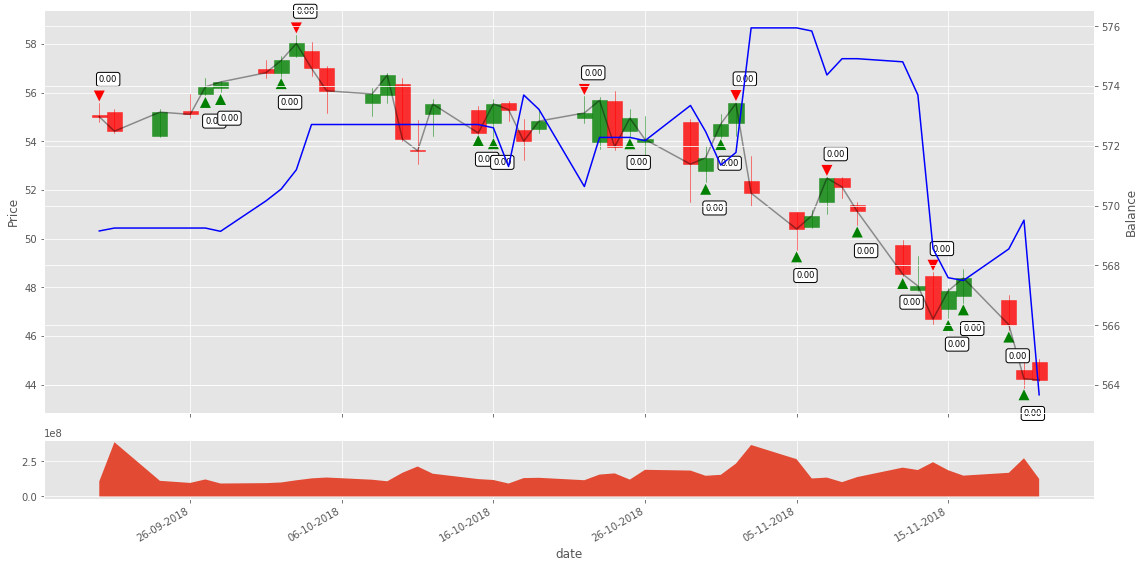

In [13]:
agent.env.mode = "test"
scores = []
success = 0

for i in range(100):
    state = agent.env.reset(visualize=True)
    score = 0
    reward = 0
    done = False
    initial_portfolio = agent.env.portfolio_value
    step = 0
    while not done:
        agent.env.render()
        #state = np.expand_dims(state, axis=0)
        action, action_onehot, prediction = agent.act(state)
        # Retrieve new state, reward, and whether the state is terminal
        next_state, reward, done, _ = agent.env.step(action)
        #print(action, reward, agent.env.portfolio_value)
        # Memorize (state, action, reward) for training
        #self.buffer.remember(np.expand_dims(state, axis=0), action_onehot, reward)
        # Update current state
        if done :
            if step < 65:
                success +=1
        step+=1
        state = next_state
        score += reward
    
    #print(score,initial_portfolio, agent.env.portfolio_value)
    scores.append(score)
    
print(np.mean(scores))
print(min(scores))
print(max(scores))
print(success)

In [ ]:
date= agent.env.df.iloc[0].name

In [ ]:
import pandas as pd
import matplotlib.dates as mpl_dates
mpl_dates.date2num([pd.to_datetime(date)])[0]

In [ ]:
agent.env.df.iloc[0]

In [ ]:
pd.read_csv('storage/datasets/ohlc__aapl__2017-01-01__2020-01-01.csv')

In [ ]:
agent.env.trading_graph.render_data